In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import os

In [ ]:
print(tf.version.VERSION)
print(tf.keras.__version__)

2.5.0
2.5.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Code to get the Fashion MNIST dataset using TensorFlow Keras API as below


In [ ]:
# Fashion - MNIST - https://github.com/zalandoresearch/fashion-mnist
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Label     Description
# 0         T-shirt/top
# 1         Trouser
# 2         Pullover
# 3         Dress
# 4         Coat
# 5         Sandal
# 6         Shirt
# 7         Sneaker
# 8         Bag
# 9         Ankle boot

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

Training dataset has 60000 images (rows) each of size (28,28) or 28x28 i.e. 2-D images, and each pixel is a value from 0 to 255 describing the pixel intensity. 0 for white and 255 for black.

Since a convolutional layer takes a 2-D image (2-D array) as input, we need not convert these 2-D images to a 1-D arrays

If we had to feed these 2-D images to a DNN (hidden layer), which expects a 1-D array as input, we would have to convert these 2-D iamges to 1-D arrays before feeding to hidden layer (DNN)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

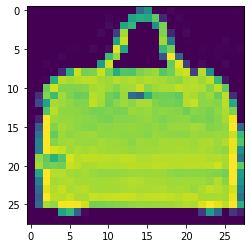

In [ ]:
# Take a look at 220th Image
plt.figure()
plt.imshow(np.squeeze(train_images[220]))

In [ ]:
# Label for 220th Image
print(class_names[train_labels[220]])

Bag


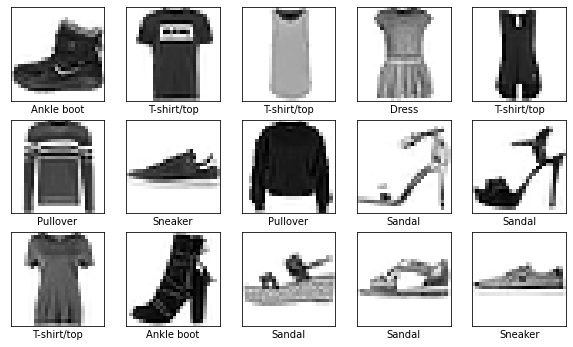

In [ ]:
# Some training images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [ ]:
# First convolutional layer. 
# Number of neurons = 32
# filter(kernel) size = 3x3
# Activation function = Relu
# input data (images) size (height, width, channels) = (28, 28, 1)
# Channels is 'colors' here. Since fashion MNIST images are grayscale, number of colors = 1, hence, channels = 1

conv1 = layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1) )

In [ ]:
# Second convolutional layer. 
# Number of neurons = 64
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv1 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv2 = layers.Conv2D(64, (3,3), activation='relu')

In [ ]:
# Second convolutional layer. 
# Number of neurons = 128
# filter(kernel) size = 3x3
# Activation function = Relu
# No separate input data for this layer, input to this layer are the 'weights' of the conv2 layer featureMaps
# no need to specify explicitly the input to the other convolutional layers (except for the first layer, as above)

conv3 = layers.Conv2D(128, (3,3), activation='relu')

In [ ]:
# Max Pool Layer
# Since input to CNN is a 2-D image and ouput from last convolutional layer (featuerMap) is also 2-D array 
# (except the third dimension i.e. channels), we will use 2D version of Max Pooling function of TensorFlow Keras
# to create a Max Pooling Layer, as shown below filter (kernel) size for Pooling Layer = 2x2

#Creating first Max. Pooling Layer
max_pool_1 = layers.MaxPooling2D((2,2))

#Creating second Max. Pooling Layer
max_pool_2 = layers.MaxPooling2D((2,2))

#Creating third Max. Pooling Layer
max_pool_3 = layers.MaxPooling2D((2,2))

In [ ]:
# Fully Connected (FC) Layer i.e. hidden layer expects input in 1-D format (1-D array), hence, we need to convert
# 2-D output (2-D array) of last convolutional layer (conv3) to 1-D array i.e. we need to flatten the 2-D array
# to 1-D array

flat_layer = layers.Flatten()

In [ ]:
# Fully Connected (FC) Layer - Hidden(Dense) Layer
# Normally, the number of neurons that we keep in FC layer should be equal to the number of neurons in just
# immediate previous convolutional layer

fc = layers.Dense(128, activation='relu')

In [ ]:
# Output Layer - with 10 neurons (as we have 10 output classes) and using 'softmax' function

output = layers.Dense(10, 'softmax')

In [ ]:
# TensorFlow Keras uses Keras Sequential API

model = models.Sequential()

model.add(conv1)
model.add(conv2)
model.add(conv3)
model.add(max_pool_1)
model.add(flat_layer)
model.add(fc)
model.add(output)

In [ ]:
# Let us see what all layers our model has

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# we are using the normalized input data

# Let us perform 20 epochs with batch_size as 512, and with shuffling = true 

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances 
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

history1 = model.fit(train_images_norm, train_labels, epochs=10, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 380s 4s/step - loss: 0.4628 - accuracy: 0.8342 - val_loss: 0.3682 - val_accuracy: 0.8650
Epoch 2/10
106/106 [==============================] - 377s 4s/step - loss: 0.3189 - accuracy: 0.8873 - val_loss: 0.2879 - val_accuracy: 0.8972
Epoch 3/10
106/106 [==============================] - 376s 4s/step - loss: 0.2686 - accuracy: 0.9037 - val_loss: 0.2569 - val_accuracy: 0.9082
Epoch 4/10
106/106 [==============================] - 376s 4s/step - loss: 0.2274 - accuracy: 0.9181 - val_loss: 0.2405 - val_accuracy: 0.9127
Epoch 5/10
106/106 [==============================] - 376s 4s/step - loss: 0.2077 - accuracy: 0.9237 - val_loss: 0.2386 - val_accuracy: 0.9182
Epoch 6/10
106/106 [==============================] - 377s 4s/step - loss: 0.1750 - accuracy: 0.9370 - val_loss: 0.2259 - val_accuracy: 0.9202
Epoch 7/10
106/106 [==============================] - 379s 4s/step - loss: 0.1563 - accuracy: 0.9432 - val_loss: 0.2360 - val_accuracy: 0.9182

In [ ]:
# we are using the normalized input data
test_loss, test_accuracy = model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 24s 76ms/step - loss: 0.2506 - accuracy: 0.9228


In [ ]:
print(test_accuracy)

0.9228000044822693


We observe from above that the model is overfitting (Training Accuracy - 99% ; Test Accuracy - 92%)

Deep learning models generally tend to be perform well on the Training data, but not on the Test data (Overfitting).

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters (number of layers and the number of neurons per layer). Second option to remove overfitting is to use Regularization techniques like - L1, L2, Dropout.

**Dropout is the most effective of all and most commonly used regularization technique .**

**NOTE:If there is a Pooling layer after a convolutional layer, the dropout layer is applied after the pooling layer** (not just after the convolutional layer, i.e. between the convolutional layer and the pooling layer)

In [ ]:
# Creating first dropout layer (for the first Conv. layer 'conv1')
drop_1 = keras.layers.Dropout(0.5)
# Creating second dropout layer (for the second Conv. layer 'conv2')
drop_2 = keras.layers.Dropout(0.5)
# Creating third dropout layer (for the third Conv. layer 'conv3')
drop_3 = keras.layers.Dropout(0.5)

In [ ]:
# Let us create a new neural network by applying these above created Dropout Layers to the respecive convolutional Layers 

# Please note that the Dropout layer for all the convolutional layers will be applied after the pooling layer (max. pool layer)

new_model = models.Sequential()

new_model.add(conv1)
# No Pooling Layer and Dropout layer for first Convolutional layer 'conv1'
new_model.add(conv2)
new_model.add(max_pool_2)
new_model.add(drop_2)
new_model.add(conv3)
new_model.add(max_pool_3)
new_model.add(drop_3)
new_model.add(flat_layer)
new_model.add(fc)
new_model.add(output)

In [ ]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)        

In [ ]:
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Let us perform 30 epochs with batch_size as 512, and with shuffling = true 

# shuffle=true will shuffle the indexes of the instances in order to allocate different sets of instances 
# in validation dataset each time cross-validation runs

# validation split=0.1 means a validation dataset of size of 10% is created from the training dataset for cross validation

history2 = new_model.fit(train_images_norm, train_labels, epochs=10, batch_size=512, shuffle=True, validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 193s 2s/step - loss: 0.5204 - accuracy: 0.8172 - val_loss: 0.3275 - val_accuracy: 0.8873
Epoch 2/10
106/106 [==============================] - 194s 2s/step - loss: 0.3432 - accuracy: 0.8746 - val_loss: 0.2958 - val_accuracy: 0.8983
Epoch 3/10
106/106 [==============================] - 192s 2s/step - loss: 0.3030 - accuracy: 0.8889 - val_loss: 0.2607 - val_accuracy: 0.9047
Epoch 4/10
106/106 [==============================] - 188s 2s/step - loss: 0.2817 - accuracy: 0.8962 - val_loss: 0.2562 - val_accuracy: 0.9092
Epoch 5/10
106/106 [==============================] - 189s 2s/step - loss: 0.2648 - accuracy: 0.9032 - val_loss: 0.2385 - val_accuracy: 0.9118
Epoch 6/10
106/106 [==============================] - 193s 2s/step - loss: 0.2515 - accuracy: 0.9078 - val_loss: 0.2331 - val_accuracy: 0.9195
Epoch 7/10
106/106 [==============================] - 193s 2s/step - loss: 0.2447 - accuracy: 0.9098 - val_loss: 0.2270 - val_accuracy: 0.9177

In [ ]:
test_loss, test_accuracy = new_model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 10s 31ms/step - loss: 0.2226 - accuracy: 0.9180


In [ ]:
print(test_accuracy)

0.9179999828338623


In [ ]:
print(test_loss)

0.22260746359825134


In [ ]:
print(history2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


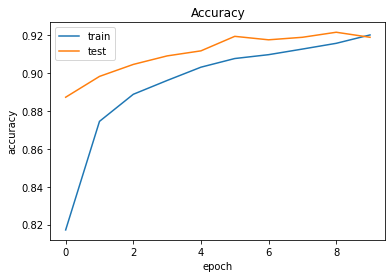

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

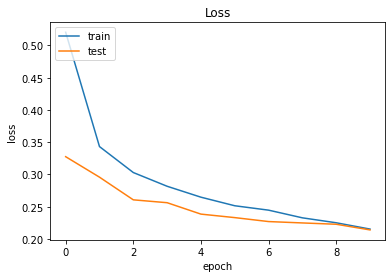

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Making predictions on Test dataset
predicted_test_labels = new_model.predict(test_images_norm)

In [ ]:
predicted_test_labels.shape

(10000, 10)

In [ ]:
imageNo = 1400
predicted_test_labels[imageNo]

array([1.2696240e-03, 9.3921641e-05, 1.0799433e-02, 4.8420049e-02,
       8.6603099e-01, 5.3393987e-06, 7.1826778e-02, 1.3353692e-04,
       1.4031789e-03, 1.7168626e-05], dtype=float32)

In [ ]:
print("Actual = ",class_names[test_labels[imageNo]])

Actual =  Coat


In [ ]:
predicted_test_labels_index = np.argmax(predicted_test_labels[imageNo])
print("Predicted = ",class_names[predicted_test_labels_index])

Predicted =  Coat


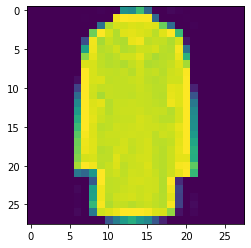

In [ ]:
plt.figure()
plt.imshow(np.squeeze(test_images[imageNo]))